In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as r
import math
from sim.plot import plot, print_particle_error

In [6]:
AUTORUN = False
robot_start = 7
num_particles = 20
distance = 40
poles = [10, 15, 17, 19, 30, 39]
 

### START STUDENT CODE
class Robot:
    def __init__(self, pos):
        self.pos = pos
        self.pole_dist = -100
        self.max_measurement = 3
        self.move_dist = 1

    # Movement is perfectly accurate, even though we are assuming it isn't.
    def move(self):
        self.pos += self.move_dist

    # Measurement is perfectly accurate even though we are assuming it isn't.
    # Multiple poles can be detected in the range, and min of these poles are considered 
    def measure(self, poles):
        potential_detected_poles = []
        for pole in poles:
            diff = pole - self.pos
            if diff > 0 and diff < self.max_measurement:
                potential_detected_poles += [diff]
        if len(potential_detected_poles) == 0:
            self.pole_dist = -100
        else:
            self.pole_dist = min(potential_detected_poles)


class Particle(Robot):
    def __init__(self, pos):
        Robot.__init__(self, pos)
        self.weight = 0
        self.movement_sigma = 0.2
        self.measurement_sigma = 1.0

    def predict(self):
        self.pos = np.random.normal(self.pos + self.move_dist, 
                                   self.movement_sigma)

    def probability_density_function(self, mu, x):
        sigma = self.measurement_sigma
        return 1 / (sigma * math.sqrt(2 * math.pi)) * math.e**(-0.5* ((x - mu) / sigma)**2)


    def update_weight(self, robot_dist):
        self.weight = self.probability_density_function(robot_dist, self.pole_dist)



def resample_particles(particles):
    # Potentially resample uniformly if weights are so low.
    weights = []
    for particle in particles:
        weights += [particle.weight]
    if (sum(weights) < 0.05):
        resampled_particles = []
        for i in range(len(particles)):
            resampled_particles += [Particle(r.uniform(0,39))]
        return resampled_particles
    
    resample = r.choices(range(num_particles), weights, k=num_particles)
    resampled_particles = []
    for i in resample:
        resampled_particles += [Particle(particles[i].pos)]    
    return resampled_particles



def initialize_particles(particles):
    #initialize the particles using uniform distribution
    #for i in range(num_particles):
    #   particles += [Particle(r.uniform(0, distance - 1))]
    
    # here we spread it uniformly because uniform distr is not strictly uniform
    diff = distance / num_particles
    for i in range(num_particles):
        particles += [Particle(diff * i)]
    
    
    
### END STUDENT CODE


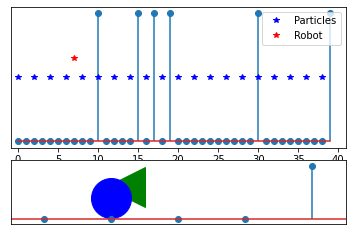

Error: 7.0
Weight Sum: 5.585191925620058



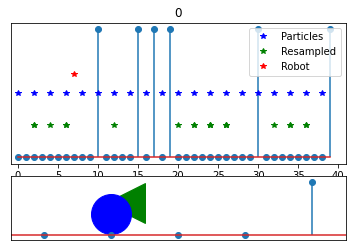

Error: 5.02
Weight Sum: 1.7658251274684298



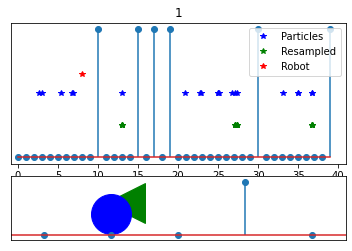

Error: 5.01
Weight Sum: 7.018353291637073



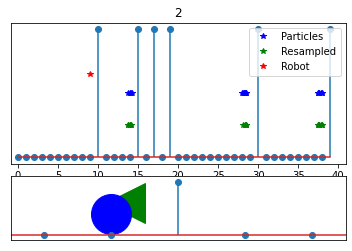

Error: 19.58
Weight Sum: 0.0



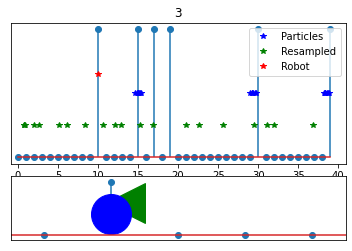

Error: 11.03
Weight Sum: 5.585191925620058



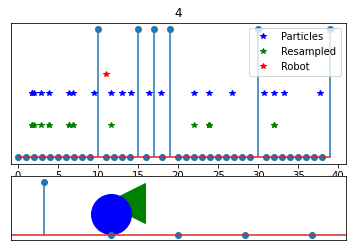

Error: 7.02
Weight Sum: 5.984134206021491



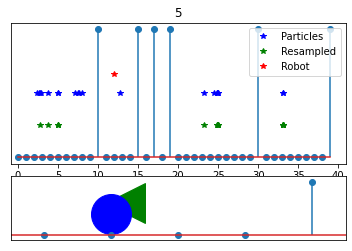

Error: 21.18
Weight Sum: 0.0



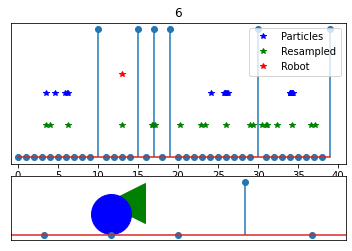

Error: 4.06
Weight Sum: 2.5883376156368842



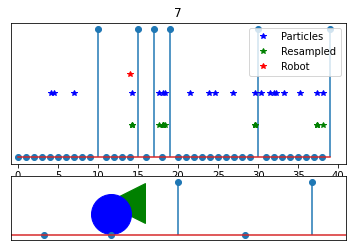

Error: 0.07
Weight Sum: 1.6447151297954592



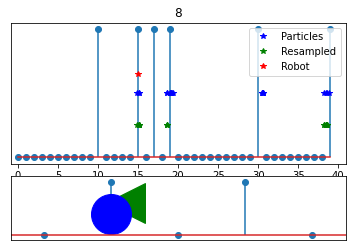

Error: 0.03
Weight Sum: 3.4779328427318514



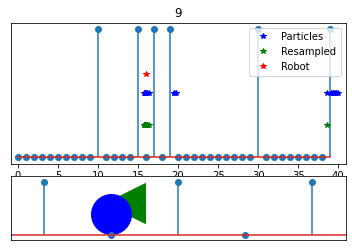

Error: 0.05
Weight Sum: 3.6826705322530513



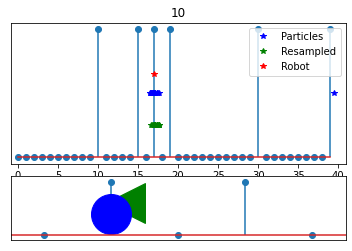

Error: 0.0
Weight Sum: 7.553438119936461



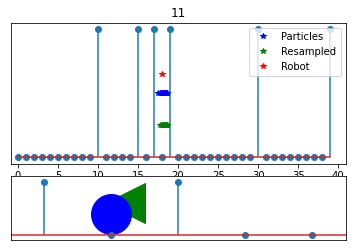

Error: 0.58
Weight Sum: 6.782018766824356



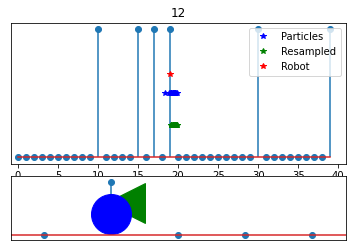

Error: 0.54
Weight Sum: 7.978845608028654



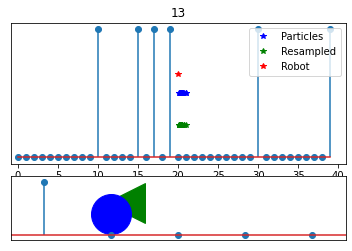

Error: 0.24
Weight Sum: 7.978845608028654



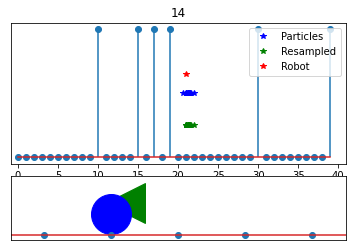

Error: 0.17
Weight Sum: 7.978845608028654



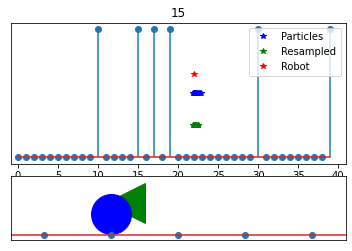

Error: 0.3
Weight Sum: 7.978845608028654



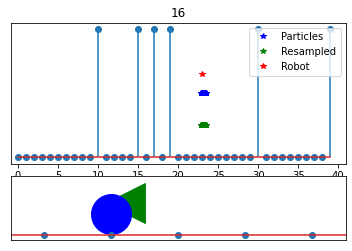

Error: 0.28
Weight Sum: 7.978845608028654



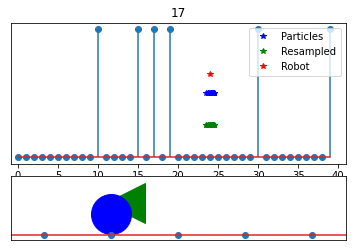

Error: 0.04
Weight Sum: 7.978845608028654



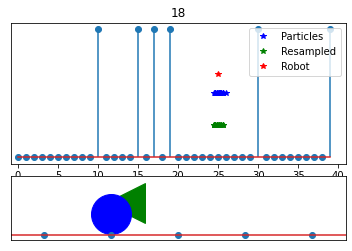

Error: 0.01
Weight Sum: 7.978845608028654



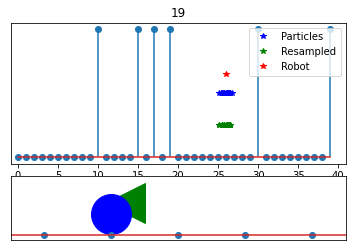

Error: 0.41
Weight Sum: 3.5904805236128943



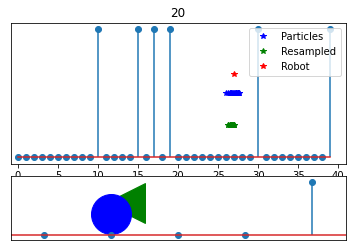

Error: 0.02
Weight Sum: 7.29451067775767



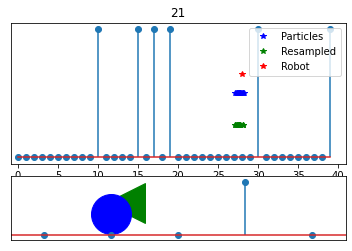

Error: 0.03
Weight Sum: 7.16855992510496



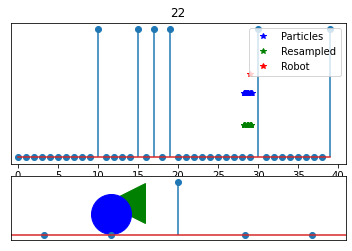

Error: 0.17
Weight Sum: 1.5957691216057308



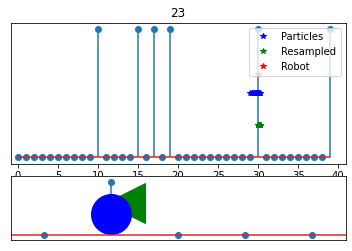

Error: 0.15
Weight Sum: 7.978845608028654



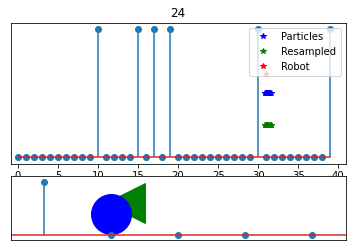

Error: 0.46
Weight Sum: 7.978845608028654



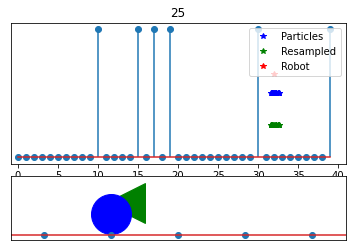

Error: 0.26
Weight Sum: 7.978845608028654



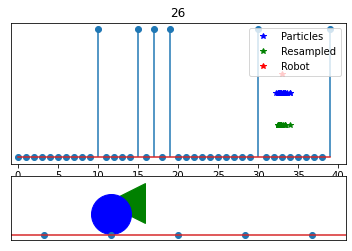

Error: 0.47
Weight Sum: 7.978845608028654



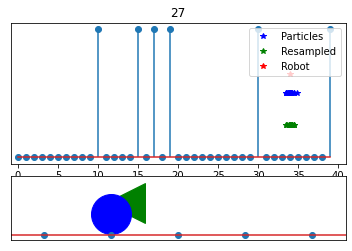

Error: 0.27
Weight Sum: 7.978845608028654



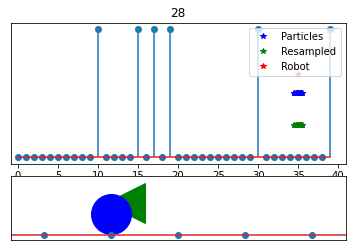

Error: 0.55
Weight Sum: 3.1915382432114616



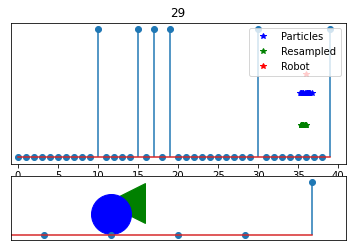

Error: 0.03
Weight Sum: 6.836125244452109



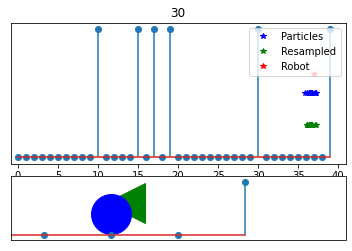

Error: 0.05
Weight Sum: 6.760433168498766



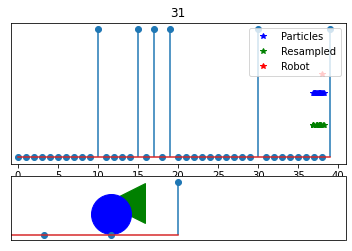

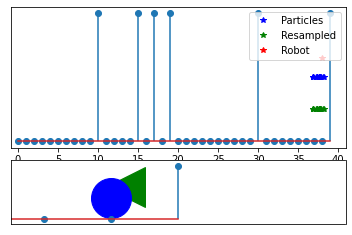

In [7]:
robot = Robot(robot_start)

# Setup particles.
particles = []
initialize_particles(particles)

# Plot starting distribution, no beliefs
plot(particles, poles, robot.pos)

# Begin Calculating
for j in range(39 - robot.pos):
    # Move
    if j != 0:
        robot.move()
        for particle in particles:
            particle.predict()

    # Measure
    robot.measure(poles)
    for particle in particles:
        particle.measure(poles)

        # Update Beliefs
        particle.update_weight(robot.pole_dist)

    print_particle_error(robot, particles)

    # Resample
    resampled_particles = resample_particles(particles)
    plot(particles, poles, robot.pos, resampled_particles, j, AUTORUN)
    particles = resampled_particles

plot(particles, poles, robot.pos, resampled_particles)
